# PowerCo. Predictive Model

## Directory, libararies and data

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
# Adjusting columns size and width

# Set display options
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.width', None)  # Adjust display width

In [4]:
df = pd.read_csv('./data_for_predictions.csv')
df.head()

,Unnamed: 0,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,pow_max,var_year_price_off_peak_var,var_year_price_peak_var,var_year_price_mid_peak_var,var_year_price_off_peak_fix,var_year_price_peak_fix,var_year_price_mid_peak_fix,var_year_price_off_peak,var_year_price_peak,var_year_price_mid_peak,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,off_peak_peak_var_mean_diff,peak_mid_peak_var_mean_diff,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff,off_peak_peak_var_max_monthly_diff,peak_mid_peak_var_max_monthly_diff,off_peak_mid_peak_var_max_monthly_diff,off_peak_peak_fix_max_monthly_diff,peak_mid_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff,tenure,months_activ,months_to_end,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,1,0.00000,25.44,25.44,2,678.99,43.648,0.000061,2.627605e-05,0.000440,1.102785,49.550703,22.022535,1.102846,4.955073e+01,22.022975,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.450670,26.040925,0.060550,0.085483,0.146033,44.266930,8.145775,44.26693,3,30,5,2,6,0,0,1,0,0,0,0,1
1,1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,0,0.00000,16.38,16.38,1,18.89,13.800,0.000005,6.089453e-04,0.000000,0.006465,0.000000,0.000000,0.006470,6.089453e-04,0.000000,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0,-0.003767,0.177779,0.142485,0.007124,0.149609,44.311375,0.000000,44.311375,0.151367,0.085483,0.151367,44.444710,0.000000,44.44471,7,76,7,76,4,1,0,0,0,0,1,0,0
2,2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,0,0.00000,28.60,28.60,1,6.60,13.856,0.000006,2.558511e-07,0.000000,0.007662,0.000000,0.000000,0.007668,2.558511e-07,0.000000,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0,-0.004670,0.177779,0.082090,0.088421,0.170512,44.385450,0.000000,44.385450,0.084587,0.089162,0.172468,44.444710,0.000000,44.44471,6,68,3,68,8,0,0,1,0,0,1,0,0
3,3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,0,0.00000,30.22,30.22,1,25.46,13.200,0.000005,0.000000e+00,0.000000,0.006465,0.000000,0.000000,0.006470,0.000000e+00,0.000000,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0,-0.004547,0.177779,0.151210,0.000000,0.151210,44.400265,0.000000,44.400265,0.153133,0.000000,0.153133,44.444710,0.000000,44.44471,6,69,2,69,9,0,0,0,1,0,1,0,0
4,4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,0,1.72689,44.91,44.91,1,47.98,19.800,0.000015,3.552481e-06,0.000003,0.005429,0.001954,0.000869,0.005444,1.957971e-03,0.000871,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0,-0.006192,0.162916,0.020536,0.030773,0.051309,16.275263,8.137629,24.412893,0.022225,0.033743,0.0558

In [5]:
df.drop(columns=["Unnamed: 0"], inplace=True)

## Model Building

### Picking the best Classification model

In [6]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(14606, 61)
(14606,)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(11684, 61)
(11684,)
(2922, 61)
(2922,)


In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=1000, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.896304   0.750000  0.009836  0.019417
Decision Tree        0.829227   0.214706  0.239344  0.226357
Random Forest        0.899726   0.772727  0.055738  0.103976
Gradient Boosting    0.895619   0.500000  0.019672  0.037855


In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=1000, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}


# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.895962   0.571429  0.013115  0.025641
Decision Tree        0.828542   0.201220  0.216393  0.208531
Random Forest        0.900411   0.850000  0.055738  0.104615
Gradient Boosting    0.895277   0.454545  0.016393  0.031646


<div><b>Random Forest:</b></div>
<div><b>Accuracy:</b> 0.899726 (High)</div>
<div><b>Precision:</b> 0.772727 (High)</div>
<div><b>Recall:</b> 0.055738 (Very Low)</div>
<div><b>F1 Score:</b> 0.103976 (Very Low)</div>
<div><b>Interpretation:</b> Similar to Logistic Regression, this model is accurate but has very low recall, meaning it misses many actual churn cases.</div>

In [10]:
# Using Recursive Elimination to remove features

In [11]:
import statsmodels.api as sm

# Initialize the list of columns
selected_features = list(X.columns)

# Set a threshold for p-values
p_value_threshold = 0.05

while len(selected_features) > 0:
    # Add a constant term for the intercept
    X_with_const = sm.add_constant(X[selected_features])
    
    # Fit the model
    model = sm.OLS(y, X_with_const).fit()
    
    # Get the p-values for the features
    p_values = model.pvalues[1:]  # Exclude the intercept
    
    # Find the feature with the maximum p-value
    max_p_value = p_values.max()
    feature_with_max_p_value = p_values.idxmax()
    
    # Check if the maximum p-value is above the threshold
    if max_p_value > p_value_threshold:
        selected_features.remove(feature_with_max_p_value)
    else:
        break

In [12]:
selected_features

['cons_last_month',
 'forecast_cons_12m',
 'forecast_price_energy_off_peak',
 'forecast_price_pow_off_peak',
 'has_gas',
 'margin_net_pow_ele',
 'net_margin',
 'pow_max',
 'var_year_price_peak',
 'var_year_price_mid_peak',
 'var_6m_price_off_peak_var',
 'var_6m_price_off_peak_fix',
 'var_6m_price_off_peak',
 'peak_mid_peak_fix_mean_diff',
 'off_peak_mid_peak_fix_mean_diff',
 'off_peak_peak_var_max_monthly_diff',
 'off_peak_mid_peak_var_max_monthly_diff',
 'off_peak_peak_fix_max_monthly_diff',
 'off_peak_mid_peak_fix_max_monthly_diff',
 'months_activ',
 'months_renewal',
 'channel_MISSING',
 'channel_foosdfpfkusacimwkcsosbicdxkicaua',
 'origin_up_ldkssxwpmemidmecebumciepifcamkci',
 'origin_up_lxidpiddsbxsbosboudacockeimpuepw']

In [13]:
# Create X_new

In [14]:
X_new = X[selected_features]
X_constant_new=sm.add_constant(X_new)

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_constant_new.values, i) for i in range(X_constant_new.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X_new.columns)

C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,vif
cons_last_month,1.320541
forecast_cons_12m,1.585193
forecast_price_energy_off_peak,16.945908
forecast_price_pow_off_peak,10.924944
has_gas,1.029564
margin_net_pow_ele,1.876940
net_margin,1.602165
pow_max,2.016491
var_year_price_peak,70.291358
var_year_price_mid_peak,61.991440


__Remove the columns with inf and extremely large values as they are perfectly collinear__

In [17]:
X_new.drop(columns=['var_6m_price_off_peak_var', 'var_6m_price_off_peak_fix',
                    'var_6m_price_off_peak', 'off_peak_peak_fix_max_monthly_diff',
                    'off_peak_mid_peak_fix_max_monthly_diff'], axis = 1, inplace = True)

C:\Users\USER\AppData\Local\Temp\ipykernel_28228\4184218089.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.drop(columns=['var_6m_price_off_peak_var', 'var_6m_price_off_peak_fix',


In [18]:
X_constant_new=sm.add_constant(X_new)

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_constant_new.values, i) for i in range(X_constant_new.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X_new.columns)

,vif
cons_last_month,1.318192
forecast_cons_12m,1.540940
forecast_price_energy_off_peak,10.373169
forecast_price_pow_off_peak,8.614999
has_gas,1.029255
margin_net_pow_ele,1.839541
net_margin,1.520306
pow_max,2.009043
var_year_price_peak,13.896251
var_year_price_mid_peak,12.753272


In [20]:
# Using X_new

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.20,random_state=42)

In [22]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(11684, 20)
(11684,)
(2922, 20)
(2922,)


In [23]:
# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=1000, random_state=42)
model = rf.fit(X_train, y_train)

In [24]:
# Get feature importances
importances = model.feature_importances_
feature_names = X_new.columns
feature_importances = pd.Series(importances, index=feature_names)

# Sort feature importances
feature_importances = feature_importances.sort_values(ascending=False)

# Print the feature importances
print("Feature Importances:")
print(feature_importances)

Feature Importances:
net_margin                                    0.118955
forecast_cons_12m                             0.114654
margin_net_pow_ele                            0.109089
cons_last_month                               0.090991
pow_max                                       0.076937
months_activ                                  0.075753
forecast_price_energy_off_peak                0.063241
off_peak_mid_peak_fix_mean_diff               0.049219
off_peak_mid_peak_var_max_monthly_diff        0.047538
var_year_price_peak                           0.046442
months_renewal                                0.046207
off_peak_peak_var_max_monthly_diff            0.046113
var_year_price_mid_peak                       0.030835
peak_mid_peak_fix_mean_diff                   0.017254
forecast_price_pow_off_peak                   0.013114
channel_foosdfpfkusacimwkcsosbicdxkicaua      0.012606
has_gas                                       0.012442
origin_up_lxidpiddsbxsbosboudacockeimpuepw  

<Axes: >

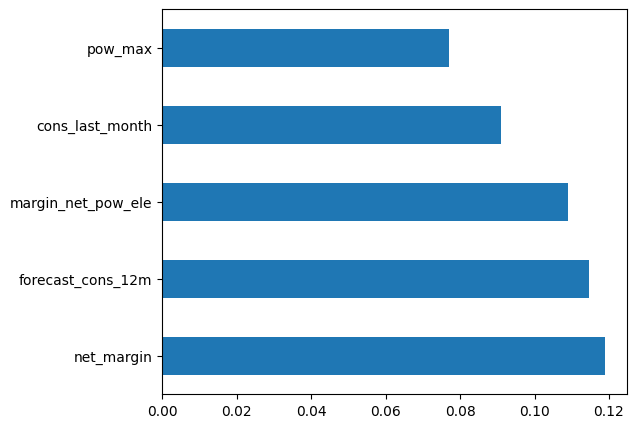

In [25]:
feature_importances.nlargest(5).plot(kind='barh',
                            figsize=(6,5))

In [26]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.895962   0.571429  0.013115  0.025641
Decision Tree        0.828542   0.201220  0.216393  0.208531
Random Forest        0.900411   0.850000  0.055738  0.104615
Gradient Boosting    0.899726   0.730769  0.062295  0.114804


In [27]:
proba_predictions = model.predict_proba(X_test)
probabilities = proba_predictions[:, 1]

In [28]:
probabilities

array([0.119, 0.165, 0.02 , ..., 0.019, 0.051, 0.255])

In [29]:
X_test = X_test.reset_index()
X_test.drop(columns='index', inplace=True)

In [92]:
X_test['churn'] = y_pred.tolist()
X_test['churn_probability'] = probabilities.tolist()
X_test.to_csv('out_of_sample_data_with_predictions.csv')